In [4]:
# import display libs
from IPython.display import Image
%matplotlib inline
from IPython.display import Latex

In [5]:
# import libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# setup figure params
figureparams = {'axes.labelsize': 24,
           'axes.titlesize': 20,
           'axes.linewidth': 1.3,
           'font.size': 20,
           'legend.fontsize': 18,
           'figure.figsize': (10,7),
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 18,
           'xtick.major.size': 5.5,
           'xtick.major.width': 1.3,
           'ytick.labelsize': 18,
           'ytick.major.size': 5.5,
           'ytick.major.width': 1.3,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(figureparams)
matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.get_configdir()

C:\Users\EdwardJansenADC\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


'C:\\Users\\EdwardJansenADC\\.matplotlib'

# Student-T Test
### Contents
    1. T-test
        a. one-sample t-test
        b. independent t-test
        c. dependent t-test
    2. Confidence interval for the one-sample t-test
        a. Analytical confidence interval
        b. Semi-bootstrapped confidence interval

## 1. T-test

The name T-test refers to all tests in which the test statistic follows the Student-T distribution. In practice, one often encounters one of three tests:
- the one sample T-test: tests whether the population mean is equal to some value $\mu_0$;
- the independent T-test: tests whether the mean of two samples is equal;
- the dependent T-test: to be filled in.

In credit risk, the one-sample T-test can be used in many cases. An example would be to test the hypothesis that the mean of yearly default rates is equal to the PD assigned to the class. Therefore, we'll focus on this test.

#### 1a. One-sample t-test

The one-sample t-test tests the null hypothesis that the population mean is equal to a specified value $\mu_0$. Its test statistic is given as

\begin{equation}
t = \frac{ \bar{x} - \mu_0 }{  \frac{s}{\sqrt{n}} },
\end{equation}
where $\bar{x}$ is the sample mean, $s$ the sample standard deviation and $n$ the sample size.

In [6]:
# generate data
#np.random.seed(1)                          # seed the random number generator, so we will generate same random set
data = 5 * np.random.randn(100) + 50        # generate two independent samples
mu = 50

In [7]:
# two-sided one-sample t-test
def one_sample_ttest(data, mu, alpha=0.05):
    from scipy.stats import sem
    from scipy.stats import t    
    # calculate means
    sample_mean = np.mean(data)
    # calculate standard errors
    std_err = sem(data)
    # calculate the t statistic
    t_stat = (sample_mean - mu) / std_err
    # degrees of freedom
    df = len(data) - 1
    # calculate the critical value --> optional
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0  # since t-distr is symmetric, difference between one and two sided test is a factor of 2
    # return everything
    return t_stat, df, cv, std_err, p

t_stat, df, cv, sem, p = one_sample_ttest(data, mu, 0.05)
print("We claim:")
print("    t_stat: " + str(t_stat))
print("    critical value: " + str(cv))
print("    p-value: " + str(p))


# check with scipy
from scipy.stats  import ttest_1samp
stat, p = ttest_1samp(data, mu)
print("Scipy says:")
print("    t_stat: " + str(stat))
print("    p-value: " + str(p))

We claim:
    t_stat: -1.5638657788184986
    critical value: 1.6603911559963895
    p-value: 0.1210401450723042
Scipy says:
    t_stat: -1.5638657788184986
    p-value: 0.12104014507230418


#### 1b. Independent t-test

In [8]:
# generate new data
#np.random.seed(1)                           # seed the random number generator, so we will generate same random set
data1 = 5 * np.random.randn(100) + 50       # generate two independent samples
data2 = 5 * np.random.randn(100) + 51


In [9]:
# independent t-test

def independent_ttest(data1, data2, alpha=0.05):
    from scipy.stats import sem
    from scipy.stats import t
    
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2 + se2**2)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

t_stat, df, cv, p = independent_ttest(data1, data2, 0.05)
print("We claim:")
print("    t_stat: " + str(t_stat))
print("    critical value: " + str(cv))
print("    p-value: " + str(p))


# check with scipy
from scipy.stats  import ttest_ind
stat, p = ttest_ind(data1, data2)
print("Scipy says:")
print("    t_stat: " + str(stat))
print("    p-value: " + str(p))

We claim:
    t_stat: -3.4290995134178877
    critical value: 1.6525857836172075
    p-value: 0.0007367659931496462
Scipy says:
    t_stat: -3.4290995134178877
    p-value: 0.0007367659931495032


#### Dependent t-test

In [10]:
# generate new data
#np.random.seed(1)                           # seed the random number generator, so we will generate same random set
data1 = 5 * np.random.randn(100) + 50       # generate two independent samples
data2 = 5 * np.random.randn(100) + 51

In [11]:
# dependent t-test

def dependent_ttest(data1, data2, alpha):
    from scipy.stats import t
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # number of paired samples
    n = len(data1)
    # sum squared difference between observations
    d1 = sum([(data1[i]-data2[i])**2 for i in range(n)])
    # sum difference between observations
    d2 = sum([data1[i]-data2[i] for i in range(n)])
    # standard deviation of the difference between means
    sd = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
    # standard error of the difference between the means
    sed = sd / np.sqrt(n)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = n - 1
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

t_stat, df, cv, p = dependent_ttest(data1, data2, 0.05)
print("We claim:")
print("    t_stat: " + str(t_stat))
print("    critical value: " + str(cv))
print("    p-value: " + str(p))


# check with scipy
from scipy.stats  import ttest_rel
stat, p = ttest_rel(data1, data2)
print("Scipy says:")
print("    t_stat: " + str(stat))
print("    p-value: " + str(p))

We claim:
    t_stat: -1.7124179642497457
    critical value: 1.6603911559963895
    p-value: 0.08995025112537736
Scipy says:
    t_stat: -1.7124179642497523
    p-value: 0.08995025112537618


## 2. Confidence interval for the one-sample t-test
#### 2a. Analytical confidence interval

The $1-\alpha$ confidence interval of the population mean is equal to

\begin{equation}
\left( \bar{x} - t_{\frac{\alpha}{2}, n-1} \frac{s}{\sqrt{n}}, \hspace{3pt} \bar{x} + t_{\frac{\alpha}{2}, n-1} \frac{s}{\sqrt{n}}  \right),
\end{equation}

where $t_{\frac{\alpha}{2}, n-1}$ is the value of the Student-T distribution at the $\frac{\alpha}{2}$th percentile.

In [12]:
# generate data
#np.random.seed(1)    # seed the random number generator, so we will generate same random set
mu = 33
data = 5 * np.random.randn(100) + mu        
obs_mean = np.round(np.mean(data), 2)

In [13]:
# two-sided one-sample t-test
# tests whether sample mean differs from known population mean mu

t_stat, df, cv, sem, p = one_sample_ttest(data, mu, 0.05)

# compute confidence interval
CI_low = np.mean(data) - cv*sem/np.sqrt(len(data))
CI_up = np.mean(data) + cv*sem/np.sqrt(len(data))
obs_mean = np.round(np.mean(data), 2)
    
print(r'with 95% conf., $\mu$ lies within: (' + str(np.round(CI_low, 2)) + ", " + str(np.round(CI_up,2)) + ')')
print("observed mean: "+ str(obs_mean)  )
print("true mean: "+ str(np.round(mu, 2)))  

with 95% conf., $\mu$ lies within: (33.8, 33.98)
observed mean: 33.89
true mean: 33


#### 2b. Bootstrapped confidence interval

To bootstrap a confidence interval for the supposed mean $\mu_0$, we could follow the following procedure:
- subtract the sample mean from the sample;
- add the supposed mean $\mu_0$ to the data;
- create a bootstrapped confidence interval for this sample;
- check whether the original sample mean lies within this confidence interval.

Since we already implement something like this in another .ipynb, let's now try to bootstrap a confidence interval for the t-statistic $t$ and use the $\frac{\alpha}{2}$th and $1 - \frac{\alpha}{2}$th percentile as input for the analytical expression given above. (Note that we're essentially estimating the Student-T distribution through bootstrapping and then use the empircal $\alpha$-confidence percentiles as critical value.)

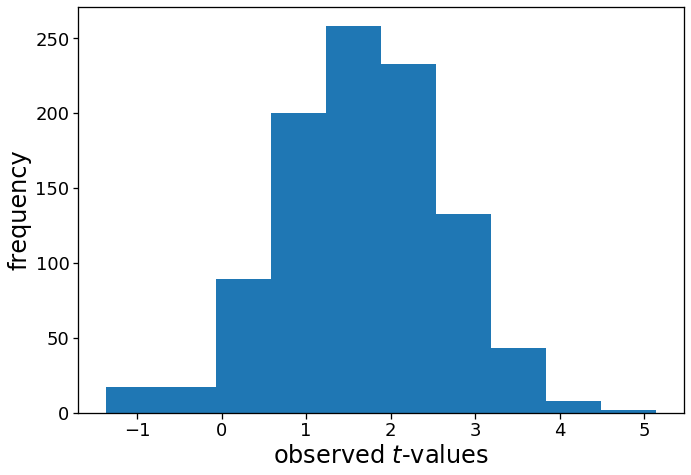

Bootstrap: real mean lies within: (33.86, 34.07)
t - confidence:, real mean lies within: (33.8, 33.98)
observed mean: 33.89
true mean: 33


In [16]:
# now with bootstrap
sim = []
sample_size = len(data)
n_iter = 1000
for i in range(n_iter):
    itersample = np.random.choice(data, size=sample_size, replace=True)
    t_stat, _, _, _, _ = one_sample_ttest(itersample, mu)
    sim.append(t_stat)

def confidence_interval(sim, alpha):
    """
    Return 2-sided symmetric confidence interval specified
    by p.
    """
    sim.sort()
    n = len(sim)
    u_pval = 1 - alpha/2
    l_pval = alpha / 2
    l_idx = int(np.floor(n*l_pval))
    u_idx = int(np.floor(n*u_pval))
    return(sim[l_idx], sim[u_idx])

# compute percentiles
bounds = confidence_interval(sim, alpha = 0.05)

plt.hist(sim)
plt.xlabel('observed $t$-values')
plt.ylabel('frequency')
plt.show()

CI_low_boots = np.mean(data) + bounds[0]*sem/np.sqrt(len(data))
CI_up_boots = np.mean(data) + bounds[1]*sem/np.sqrt(len(data))

print("Bootstrap: real mean lies within: (" + str(np.round(CI_low_boots, 2)) + ", " + str(np.round(CI_up_boots,2)) + ")")
print("t - confidence:, real mean lies within: (" + str(np.round(CI_low, 2)) + ", " + str(np.round(CI_up,2)) + ")")
print("observed mean: "+ str(obs_mean)  )
print("true mean: "+ str(np.round(mu, 2)))  